In [358]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from PIL import Image
from io import BytesIO
import glob
import random
import requests

In [274]:
# plays_df = pd.concat(map(pd.read_csv, glob.glob(f'data/nfl-big-data-bowl-2024/plays.csv')))
plays_df = pd.read_csv('data/nfl-big-data-bowl-2024/plays.csv')
plays_df.head()

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,...,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,...,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,...,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN


In [275]:
games_df = pd.concat(map(pd.read_csv, glob.glob(f'data/nfl-big-data-bowl-2024/games.csv')))
games_df.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,09/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,09/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,09/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,09/11/2022,13:00:00,CIN,PIT,20,23


In [276]:
teams_json = requests.get('https://site.api.espn.com/apis/site/v2/sports/football/nfl/teams').json()
teams = teams_json['sports'][0]['leagues'][0]['teams']

team_dict = []

for t in teams:
    team_dict.append({
        'id': t['team']['id'],
        'color': t['team']['color'],
        'alternateColor': t['team']['color'],
        'logo': t['team']['logos'][0]['href'],
        'abbreviation': t['team']['abbreviation'],
        'displayName': t['team']['displayName'],
        'location': t['team']['location'],
        'name': t['team']['name'],
        'nickname': t['team']['nickname'],
        'shortDisplayName': t['team']['shortDisplayName'],
    })

team_df = pd.DataFrame(team_dict).set_index('abbreviation')
team_df

,id,color,alternateColor,logo,displayName,location,name,nickname,shortDisplayName
abbreviation,,,,,,,,,
ARI,22,a4113e,a4113e,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png,Arizona Cardinals,Arizona,Cardinals,Cardinals,Cardinals
ATL,1,a71930,a71930,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png,Atlanta Falcons,Atlanta,Falcons,Falcons,Falcons
BAL,33,29126f,29126f,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,Baltimore Ravens,Baltimore,Ravens,Ravens,Ravens
BUF,2,00338d,00338d,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png,Buffalo Bills,Buffalo,Bills,Bills,Bills
CAR,29,0085ca,0085ca,https://a.espncdn.com/i/teamlogos/nfl/500/car.png,Carolina Panthers,Carolina,Panthers,Panthers,Panthers
CHI,3,0b1c3a,0b1c3a,https://a.espncdn.com/i/teamlogos/nfl/500/chi.png,Chicago Bears,Chicago,Bears,Bears,Bears
CIN,4,fb4f14,fb4f14,https://a.espncdn.com/i/teamlogos/nfl/500/cin.png,Cincinnati Bengals,Cincinnati,Bengals,Bengals,Bengals
CLE,5,472a08,472a08,https://a.espncdn.com/i/teamlogos/nfl/500/cle.png,Cleveland Browns,Cleveland,Browns,Browns,Browns
DAL,6,002a5c,002a5c,https://a.espncdn.com/i/teamlogos/nfl/500/dal.png,Dallas Cowboys,Dallas,Cowboys,Cowboys,Cowboys


In [277]:
plays_df.dtypes

gameId                                int64
playId                                int64
ballCarrierId                         int64
ballCarrierDisplayName               object
playDescription                      object
quarter                               int64
down                                  int64
yardsToGo                             int64
possessionTeam                       object
defensiveTeam                        object
yardlineSide                         object
yardlineNumber                        int64
gameClock                            object
preSnapHomeScore                      int64
preSnapVisitorScore                   int64
passResult                           object
passLength                          float64
penaltyYards                        float64
prePenaltyPlayResult                  int64
playResult                            int64
playNullifiedByPenalty               object
absoluteYardlineNumber                int64
offenseFormation                

In [278]:
plays_df['play_uuid'] = plays_df['gameId'].astype(str) + '.' + plays_df['playId'].astype(str)
plays_df['play_uuid'].head()

0    2022100908.3537
1    2022091103.3126
2    2022091111.1148
3    2022100212.2007
4    2022091900.1372
Name: play_uuid, dtype: object

In [279]:
# prompt: load all CSV files with a name like "tracking_week_" into a tracking_df dataframe
import glob
tracking_df = pd.concat(map(pd.read_csv, glob.glob(f'data/nfl-big-data-bowl-2024/*week*.csv')))

In [280]:
tracking_df['play_uuid'] = tracking_df['gameId'].astype(str) + '.' + tracking_df['playId'].astype(str)
tracking_df['play_uuid'].head()

0    2022100600.90
1    2022100600.90
2    2022100600.90
3    2022100600.90
4    2022100600.90
Name: play_uuid, dtype: object

In [281]:
tracking_df['event'].unique()

array([nan, 'ball_snap', 'handoff', 'first_contact', 'tackle',
       'pass_arrived', 'pass_outcome_caught', 'out_of_bounds', 'run',
       'fumble', 'man_in_motion', 'autoevent_passforward', 'shift',
       'play_action', 'touchdown', 'pass_forward', 'snap_direct',
       'line_set', 'qb_slide', 'autoevent_ballsnap',
       'autoevent_passinterrupted', 'pass_shovel', 'lateral',
       'penalty_flag', 'qb_sack', 'fumble_offense_recovered', 'safety',
       'pass_outcome_touchdown', 'fumble_defense_recovered',
       'run_pass_option', 'penalty_accepted'], dtype=object)

In [282]:
ball_snap_df = tracking_df.loc[(tracking_df['event'] == 'ball_snap')]
ball_snap_df.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,play_uuid
5,2022100600,90,33084.0,Matt Ryan,6,2022-10-06 20:17:05.299999,2.0,IND,left,90.26,23.69,0.20,0.14,0.04,274.45,250.64,ball_snap,2022100600.90
65,2022100600,90,35459.0,Kareem Jackson,6,2022-10-06 20:17:05.299999,22.0,DEN,left,72.17,16.80,0.48,0.94,0.05,119.60,125.33,ball_snap,2022100600.90
125,2022100600,90,42030.0,K'Waun Williams,6,2022-10-06 20:17:05.299999,21.0,DEN,left,80.22,31.04,3.41,2.96,0.35,128.25,199.16,ball_snap,2022100600.90
185,2022100600,90,42393.0,Ronald Darby,6,2022-10-06 20:17:05.299999,23.0,DEN,left,76.83,36.25,0.04,0.14,0.01,73.29,206.98,ball_snap,2022100600.90
245,2022100600,90,43307.0,Ryan Kelly,6,2022-10-06 20:17:05.299999,78.0,IND,left,85.75,23.80,0.08,0.38,0.01,252.44,311.45,ball_snap,2022100600.90


In [283]:
position_counts = ball_snap_df[['play_uuid', 'nflId']].groupby('play_uuid').count()
all_22_play_ids = position_counts.loc[(position_counts['nflId'] == 22)].index
all_22_play_ids

Index(['2022090800.101', '2022090800.1187', '2022090800.1254',
       '2022090800.1385', '2022090800.1406', '2022090800.146',
       '2022090800.1736', '2022090800.191', '2022090800.1946',
       '2022090800.2043',
       ...
       '2022110700.3787', '2022110700.403', '2022110700.443', '2022110700.493',
       '2022110700.546', '2022110700.612', '2022110700.670', '2022110700.80',
       '2022110700.929', '2022110700.950'],
      dtype='object', name='play_uuid', length=6323)

In [284]:
all_22_plays = plays_df.loc[(plays_df['play_uuid'].isin(all_22_play_ids))]
all_22_plays

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,play_uuid
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN,2022091103.3126
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,...,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN,2022100212.2007
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,...,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN,2022091900.1372
7,2022102310,56,46377,Jeffery Wilson,(15:00) J.Wilson left tackle to SF 32 for 7 ya...,1,1,10,SF,KC,...,0.431279,0.001382,-0.001382,1.298699,0.282340,NaN,NaN,NaN,NaN,2022102310.56
8,2022102310,1318,41325,Jerick McKinnon,(10:31) (Shotgun) J.McKinnon left guard to KC ...,2,1,10,KC,SF,...,0.320394,-0.015303,0.015303,1.827773,0.733410,NaN,NaN,NaN,NaN,2022102310.1318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12477,2022102307,1224,42358,Melvin Gordon,(14:18) (Shotgun) M.Gordon left tackle to NYJ ...,2,2,8,DEN,NYJ,...,0.541196,-0.036002,0.036002,1.939443,-0.817222,NaN,NaN,NaN,NaN,2022102307.1224
12481,2022100204,123,43293,Ezekiel Elliott,(13:31) E.Elliott right tackle to WAS 38 for 1...,1,1,10,DAL,WAS,...,0.361400,-0.011542,0.011542,3.642571,-0.504018,NaN,NaN,NaN,NaN,2022100204.123
12483,2022101605,3371,44860,Joe Mixon,(9:35) (Shotgun) J.Mixon left end to CIN 47 fo...,4,1,10,CIN,NO,...,0.332946,-0.005164,0.005164,2.115356,0.203819,NaN,NaN,NaN,NaN,2022101605.3371
12484,2022100207,2777,52449,Jonathan Taylor,(2:02) (Shotgun) J.Taylor up the middle to TEN...,3,1,10,IND,TEN,...,0.589389,-0.046648,0.046648,3.946232,-0.976039,NaN,NaN,NaN,NaN,2022100207.2777


In [285]:
third_down_df = all_22_plays.loc[(all_22_plays['down'] == 3)]
third_down_df.columns

Index(['gameId', 'playId', 'ballCarrierId', 'ballCarrierDisplayName',
       'playDescription', 'quarter', 'down', 'yardsToGo', 'possessionTeam',
       'defensiveTeam', 'yardlineSide', 'yardlineNumber', 'gameClock',
       'preSnapHomeScore', 'preSnapVisitorScore', 'passResult', 'passLength',
       'penaltyYards', 'prePenaltyPlayResult', 'playResult',
       'playNullifiedByPenalty', 'absoluteYardlineNumber', 'offenseFormation',
       'defendersInTheBox', 'passProbability', 'preSnapHomeTeamWinProbability',
       'preSnapVisitorTeamWinProbability', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPoints', 'expectedPointsAdded',
       'foulName1', 'foulName2', 'foulNFLId1', 'foulNFLId2', 'play_uuid'],
      dtype='object')

In [286]:
all_22_frames_df = ball_snap_df.loc[(ball_snap_df['play_uuid'].isin(all_22_play_ids))]
all_22_frames_df.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,play_uuid
5,2022100600,90,33084.0,Matt Ryan,6,2022-10-06 20:17:05.299999,2.0,IND,left,90.26,23.69,0.20,0.14,0.04,274.45,250.64,ball_snap,2022100600.90
65,2022100600,90,35459.0,Kareem Jackson,6,2022-10-06 20:17:05.299999,22.0,DEN,left,72.17,16.80,0.48,0.94,0.05,119.60,125.33,ball_snap,2022100600.90
125,2022100600,90,42030.0,K'Waun Williams,6,2022-10-06 20:17:05.299999,21.0,DEN,left,80.22,31.04,3.41,2.96,0.35,128.25,199.16,ball_snap,2022100600.90
185,2022100600,90,42393.0,Ronald Darby,6,2022-10-06 20:17:05.299999,23.0,DEN,left,76.83,36.25,0.04,0.14,0.01,73.29,206.98,ball_snap,2022100600.90
245,2022100600,90,43307.0,Ryan Kelly,6,2022-10-06 20:17:05.299999,78.0,IND,left,85.75,23.80,0.08,0.38,0.01,252.44,311.45,ball_snap,2022100600.90


In [287]:
third_down_frames_df = ball_snap_df.loc[(ball_snap_df['play_uuid'].isin(third_down_df['play_uuid']))]
third_down_frames_df.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,play_uuid
22683,2022100600,1069,38540.0,Stephon Gilmore,6,2022-10-06 20:58:22.400000,5.0,IND,left,38.44,14.13,0.05,0.05,0.00,37.15,272.30,ball_snap,2022100600.1069
22734,2022100600,1069,38605.0,Russell Wilson,6,2022-10-06 20:58:22.400000,3.0,DEN,left,45.20,23.77,0.00,0.00,0.01,272.11,354.59,ball_snap,2022100600.1069
22785,2022100600,1069,38843.0,Rodney McLeod,6,2022-10-06 20:58:22.400000,26.0,IND,left,40.60,18.62,0.01,0.01,0.00,76.12,96.10,ball_snap,2022100600.1069
22836,2022100600,1069,41369.0,Cameron Fleming,6,2022-10-06 20:58:22.400000,73.0,DEN,left,45.05,26.58,0.56,1.91,0.06,273.86,214.51,ball_snap,2022100600.1069
22887,2022100600,1069,42358.0,Melvin Gordon,6,2022-10-06 20:58:22.400000,25.0,DEN,left,49.91,23.79,0.11,0.63,0.01,261.38,256.08,ball_snap,2022100600.1069


In [288]:
third_down_frames_df.columns

Index(['gameId', 'playId', 'nflId', 'displayName', 'frameId', 'time',
       'jerseyNumber', 'club', 'playDirection', 'x', 'y', 's', 'a', 'dis', 'o',
       'dir', 'event', 'play_uuid'],
      dtype='object')

In [363]:
random_play =  random.randint(0, len(third_down_frames_df))
random_id = third_down_frames_df.iloc[random_play]['play_uuid']
play_frame = third_down_frames_df.loc[(third_down_frames_df['play_uuid'] == random_id)]
play_frame

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,play_uuid
1091695,2022091811,3673,37077.0,A.J. Green,6,2022-09-18 19:11:57.200000,18.0,ARI,left,54.010000,44.43,0.03,0.03,0.00,308.86,337.18,ball_snap,2022091811.3673
1091745,2022091811,3673,37130.0,Rodney Hudson,6,2022-09-18 19:11:57.200000,61.0,ARI,left,53.540000,27.16,0.01,0.11,0.00,262.78,187.80,ball_snap,2022091811.3673
1091795,2022091811,3673,38551.0,Chandler Jones,6,2022-09-18 19:11:57.200000,55.0,LV,left,51.910000,21.80,0.00,0.00,0.00,58.95,63.56,ball_snap,2022091811.3673
1091845,2022091811,3673,38779.0,Kelvin Beachum,6,2022-09-18 19:11:57.200000,68.0,ARI,left,54.310000,30.35,0.00,0.00,0.00,246.31,8.43,ball_snap,2022091811.3673
1091895,2022091811,3673,39965.0,Justin Pugh,6,2022-09-18 19:11:57.200000,67.0,ARI,left,54.130000,25.82,0.00,0.00,0.00,290.58,23.76,ball_snap,2022091811.3673
1091945,2022091811,3673,39983.0,Zach Ertz,6,2022-09-18 19:11:57.200000,86.0,ARI,left,53.920000,18.78,0.00,0.00,0.01,277.48,259.29,ball_snap,2022091811.3673
1091995,2022091811,3673,40039.0,Duron Harmon,6,2022-09-18 19:11:57.200000,30.0,LV,left,34.400000,22.47,1.07,0.52,0.11,84.12,269.21,ball_snap,2022091811.3673
1092045,2022091811,3673,42367.0,D.J. Humphries,6,2022-09-18 19:11:57.200000,74.0,ARI,left,54.200000,23.91,0.00,0.00,0.00,271.79,7.58,ball_snap,2022091811.3673
1092095,2022091811,3673,46103.0,Will Hernandez,6,2022-09-18 19:11:57.200000,76.0,ARI,left,54.030000,28.80,0.00,0.00,0.00,273.17,130.04,ball_snap,2022091811.3673
1092145,2022091811,3673,46387.0,Kendal Vickers,6,2022-09-18 19:11:57.200000,95.0,LV,left,51.910000,28.78,0.00,0.00,0.00,114.91,318.54,ball_snap,2022091811.3673


In [364]:
play = all_22_plays.loc[(all_22_plays['play_uuid'] == random_id)].iloc[0]
play

gameId                                                                     2022091811
playId                                                                           3673
ballCarrierId                                                                   46526
ballCarrierDisplayName                                                Darrel Williams
playDescription                     (3:03) (No Huddle, Shotgun) D.Williams left gu...
quarter                                                                             4
down                                                                                3
yardsToGo                                                                           1
possessionTeam                                                                    ARI
defensiveTeam                                                                      LV
yardlineSide                                                                       LV
yardlineNumber                                        

In [365]:
game = games_df.loc[(games_df['gameId'] == play['gameId'])].iloc[0]
game

gameId               2022091811
season                     2022
week                          2
gameDate             09/18/2022
gameTimeEastern        16:25:00
homeTeamAbbr                 LV
visitorTeamAbbr             ARI
homeFinalScore               23
visitorFinalScore            29
Name: 28, dtype: object

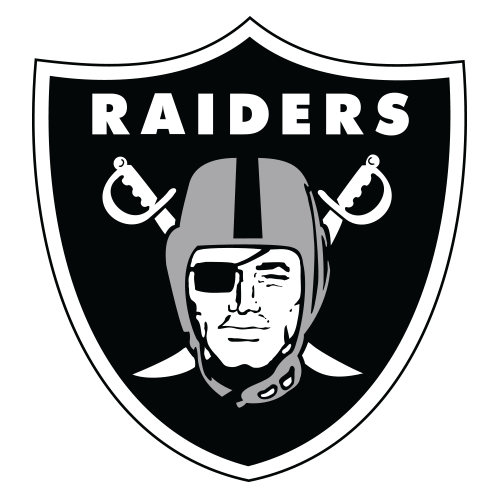

In [366]:
response = requests.get(team_df.loc[game['homeTeamAbbr']]['logo'])
img = Image.open(BytesIO(response.content))
img

In [367]:
teams = play_frame['club'].unique()
colors = {teams[0]: mcolors.to_rgba('#' + team_df.loc[teams[0]]['color']), 
          teams[1]: mcolors.to_rgba('#' + team_df.loc[teams[1]]['color']), 
          'football': 'brown'}

/var/folders/m8/xlwp526d3sxf6fyr2v802l_80000gn/T/ipykernel_65573/1399159258.py:33: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(play_frame[play_frame['club'] == team]['x'], play_frame[play_frame['club'] == team]['y']


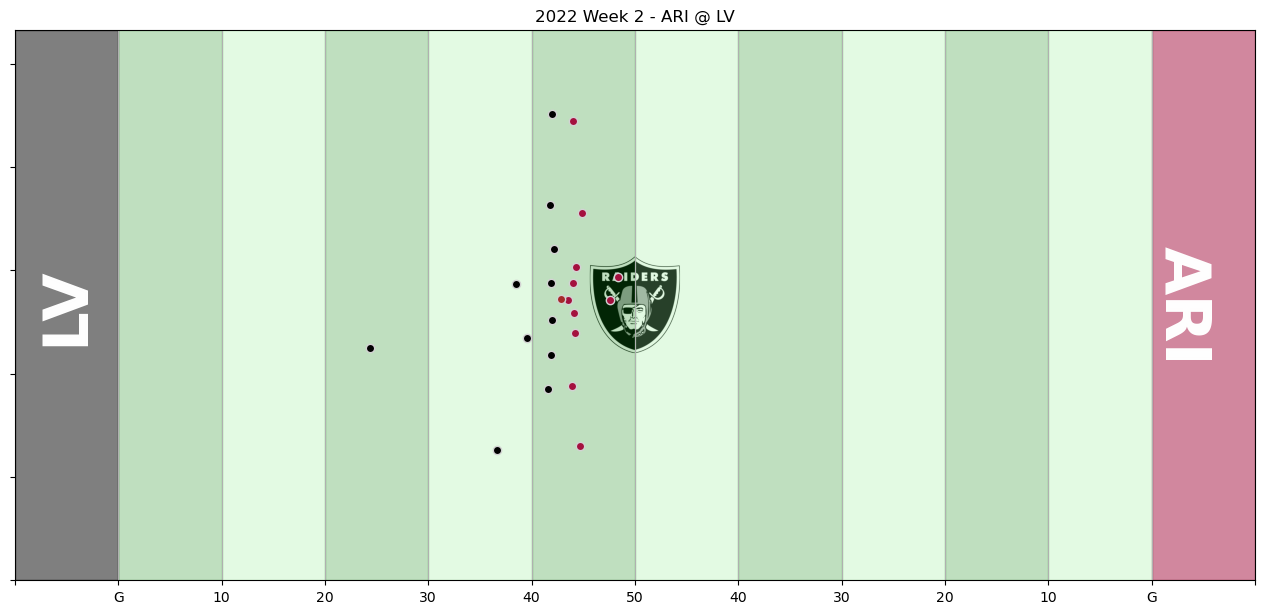

In [369]:
plt.figure(figsize=(16, 8))
plt.title(f"{game['season']} Week {game['week']} - {game['visitorTeamAbbr']} @ {game['homeTeamAbbr']}")

# Set x and y scales
plt.xlim(0, 120)  # Adjust the limits according to your data
plt.ylim(0, 53.3)  # Adjust the limits according to your data

for i in range(10, 101, 20):    
    plt.axvspan(i, i+10, color='green', alpha=0.25)
    plt.axvspan(i+10, i+20, color='lightgreen', alpha=0.25)

# Hide y-axis labels
plt.gca().set_yticklabels([])
plt.xticks([0,10,20,30,40,50,60,70,80,90,100,110,120])
plt.gca().set_xticklabels(['','G','10','20','30','40','50','40','30','20','10','G',''])

x_max = max(play_frame['x'])
max_team = play_frame.loc[(play_frame['x'] == x_max)].iloc[0]['club']
plt.annotate(max_team, xy=[113, 26.65], xytext=[113, 26.65], fontsize=45, 
            fontweight='bold',color='white', rotation=270,ha='center', va='center')
plt.axvspan(110, 120, color=colors[max_team], alpha=0.5)

x_min = min(play_frame['x'])
min_team = play_frame.loc[(play_frame['x'] == x_min)].iloc[0]['club']
plt.annotate(min_team, xy=[5,26.65], xytext=[5,26.65], fontsize=45, fontweight='bold',
             color='white', rotation=90,ha='center', va='center')
plt.axvspan(0, 10, color=colors[min_team], alpha=0.5)

plt.imshow(img, extent=[55,65,21.65,31.65])


for team, color in colors.items():
    plt.scatter(play_frame[play_frame['club'] == team]['x'], play_frame[play_frame['club'] == team]['y']
                , c=color, label=team, alpha=1, edgecolor='lightgray')

# Show plot
plt.grid(True, axis='x')
plt.show()
